Notes.
1. Like 6 columns are not needed, because they have more than 50% null values
2. Columns to be predicted should be IT, that's if it's IT or not
3. Job post and salary column can be dropped
4. The data needs a lot of cleaning
5. We should consider the time of more job post (days, year, month)
6. The state or country with the higest job posts.
7. The prevalent skill requirements
8. Companies with the highest job posts
9. The intervals between posting date and deadlines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('job_posts.csv')
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [3]:
len(df.columns)

24

In [4]:
df.shape

(19001, 24)

In [5]:
df.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [6]:
len(df)

19001

In [7]:
empty = df.isnull().sum()

total = len(df)

null_per = empty * 100 / total

null_per[null_per > 50][:]

AnnouncementCode    93.642440
Term                59.602126
Eligibility         74.053997
Audience            96.631756
Notes               88.363770
Attach              91.795169
dtype: float64

In [8]:
cols_drop = null_per[null_per > 50].keys
cols_drop 

<bound method Series.keys of AnnouncementCode    93.642440
Term                59.602126
Eligibility         74.053997
Audience            96.631756
Notes               88.363770
Attach              91.795169
dtype: float64>

In [9]:
df.Audience.value_counts()

All interested candidates                                                             105
Professionals                                                                          94
All qualified candidates                                                               61
Software Developers                                                                    22
All interested candidates.                                                             14
                                                                                     ... 
To all interested candidates.                                                           1
Web-design professionals                                                                1
System Administrators, IT specialists                                                   1
Graphic and Web Designers                                                               1
Professionals working in the public sector and/ or\r\nnonprofit sector in Armenia.      1
Name: Audi

In [10]:
df.drop(['AnnouncementCode', 'Term', 'Eligibility', 'Audience', 'Notes', 'Attach'], axis=1, inplace=True)

In [11]:
df.drop(['Salary'], axis=1, inplace=True)

In [12]:
df.shape

(19001, 17)

In [13]:
df.head()

,jobpost,date,Title,Company,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,ApplicationP,OpeningDate,Deadline,AboutC,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...","To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \r\...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\r\...,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,The International Research & Exchanges Board (...,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,Renewable annual contract\r\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,The Caucasus Environmental NGO Network is a\r\...,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,2004,1,True


In [14]:
df.isnull().sum()

jobpost              0
date                 0
Title               28
Company              7
StartDate         9326
Duration          8203
Location            32
JobDescription    3892
JobRequirment     2522
RequiredQual       484
ApplicationP        60
OpeningDate        706
Deadline            65
AboutC            6531
Year                 0
Month                0
IT                   0
dtype: int64

In [15]:
#I dropped the job post because it's redundant
df.drop(['jobpost'], inplace=True, axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            19001 non-null  object
 1   Title           18973 non-null  object
 2   Company         18994 non-null  object
 3   StartDate       9675 non-null   object
 4   Duration        10798 non-null  object
 5   Location        18969 non-null  object
 6   JobDescription  15109 non-null  object
 7   JobRequirment   16479 non-null  object
 8   RequiredQual    18517 non-null  object
 9   ApplicationP    18941 non-null  object
 10  OpeningDate     18295 non-null  object
 11  Deadline        18936 non-null  object
 12  AboutC          12470 non-null  object
 13  Year            19001 non-null  int64 
 14  Month           19001 non-null  int64 
 15  IT              19001 non-null  bool  
dtypes: bool(1), int64(2), object(13)
memory usage: 2.2+ MB


In [17]:
df.head()

,date,Title,Company,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,ApplicationP,OpeningDate,Deadline,AboutC,Year,Month,IT
0,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...","To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,2004,1,False
1,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \r\...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\r\...,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,The International Research & Exchanges Board (...,2004,1,False
2,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,Renewable annual contract\r\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,The Caucasus Environmental NGO Network is a\r\...,2004,1,False
3,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,2004,1,False
4,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,2004,1,True


In [18]:
df.IT.value_counts()

False    15242
True      3759
Name: IT, dtype: int64

In [24]:
df.OpeningDate

0                     NaN
1                     NaN
2                     NaN
3                     NaN
4                     NaN
               ...       
18996    29 December 2015
18997    30 December 2015
18998    30 December 2015
18999    30 December 2015
19000    30 December 2015
Name: OpeningDate, Length: 19001, dtype: object

In [25]:
df.date

0         Jan 5, 2004
1         Jan 7, 2004
2         Jan 7, 2004
3         Jan 7, 2004
4        Jan 10, 2004
             ...     
18996    Dec 28, 2015
18997    Dec 30, 2015
18998    Dec 30, 2015
18999    Dec 30, 2015
19000    Dec 30, 2015
Name: date, Length: 19001, dtype: object

In [26]:
df.OpeningDate.isnull().sum()

706

In [27]:
df.date.isnull().sum()

0

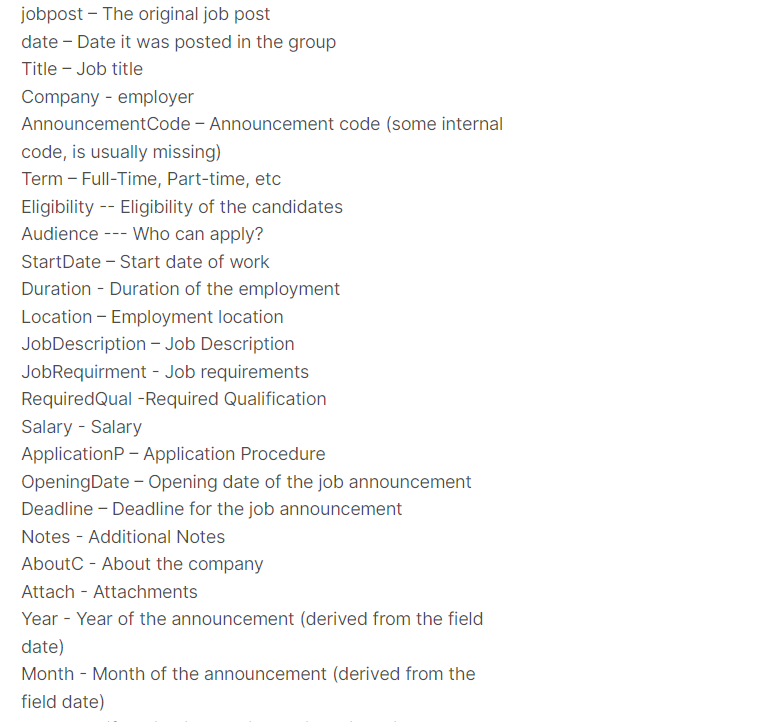

The opening date and date is the same thing for me. I think opening date should be dropped, so we can have only date. 
This is because, opening date has a lot of missing values and can be seen as the date for application

In [28]:
df.drop(['OpeningDate'], axis=1, inplace=True)

In [29]:
df.head()

,date,Title,Company,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,ApplicationP,Deadline,AboutC,Year,Month,IT
0,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...","To apply for this position, please submit a\r\...",26 January 2004,NaN,2004,1,False
1,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \r\...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\r\...,Please submit a cover letter and resume to:\r\...,12 January 2004,The International Research & Exchanges Board (...,2004,1,False
2,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,Renewable annual contract\r\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",Please send resume or CV toursula.kazarian@......,20 January 2004\r\nSTART DATE: February 2004,The Caucasus Environmental NGO Network is a\r\...,2004,1,False
3,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",Please send cover letter and resume to Amy\r\n...,23 January 2004\r\nSTART DATE: Immediate,NaN,2004,1,False
4,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,Successful candidates should submit\r\n- CV; \...,"20 January 2004, 18:00",NaN,2004,1,True


The  date column can also be dropped, because it has been separated into Year and Month, which is enough for Analysis. We can create a new column to check the days with highest posting.

In [31]:
df.date

0         Jan 5, 2004
1         Jan 7, 2004
2         Jan 7, 2004
3         Jan 7, 2004
4        Jan 10, 2004
             ...     
18996    Dec 28, 2015
18997    Dec 30, 2015
18998    Dec 30, 2015
18999    Dec 30, 2015
19000    Dec 30, 2015
Name: date, Length: 19001, dtype: object

In [34]:
df['date']=pd.to_datetime(df['date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-06-01 22:13:00

In [40]:
#The number of companies we have
len(df.Company.unique())

4555

In [41]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [42]:
df["IT"] = label.fit_transform(df["IT"])

In [44]:
df.IT.value_counts()

0    15242
1     3759
Name: IT, dtype: int64

In [45]:
df.head()

,date,Title,Company,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,ApplicationP,Deadline,AboutC,Year,Month,IT
0,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...","To apply for this position, please submit a\r\...",26 January 2004,NaN,2004,1,0
1,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \r\...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\r\...,Please submit a cover letter and resume to:\r\...,12 January 2004,The International Research & Exchanges Board (...,2004,1,0
2,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,Renewable annual contract\r\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",Please send resume or CV toursula.kazarian@......,20 January 2004\r\nSTART DATE: February 2004,The Caucasus Environmental NGO Network is a\r\...,2004,1,0
3,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",Please send cover letter and resume to Amy\r\n...,23 January 2004\r\nSTART DATE: Immediate,NaN,2004,1,0
4,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,Successful candidates should submit\r\n- CV; \...,"20 January 2004, 18:00",NaN,2004,1,1


In [47]:
df.Title.value_counts()

Accountant                                                 328
Chief Accountant                                           219
Medical Representative                                     216
Sales Manager                                              166
Administrative Assistant                                   155
                                                          ... 
Public Relations and Marketing Manager                       1
Software Developer (Ajax, ASP .Net)                          1
Software Developer (Ajax, PHP)                               1
Analyst, Analysis Division, Financial Monitoring Center      1
Head of Online Sales Department                              1
Name: Title, Length: 8636, dtype: int64

In [49]:
len(df.Title.unique())

8637